## Final Assessment

### 3.1 Import Library

In [1]:
import time
start_time = time.time()

In [30]:
import os
import copy
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import seaborn as sn
import scipy.stats as sps
import matplotlib
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

### 3.2 Pulling Data

In [84]:
df = pd.read_csv(os.path.join('data','carbon_all.csv'), low_memory=False)

In [85]:
df_list = pd.read_csv(os.path.join('data','carbon_list.csv'), low_memory=False)

In [86]:
df_list.columns

Index(['Date', 'Country', 'City', 'Specie', 'count', 'min', 'max', 'median',
       'variance', 'year_month'],
      dtype='object')

In [87]:
df_list1 = df_list[df_list['Specie'].isin(['pm25','pm10','o3','no2','so2','co'])]

In [88]:
df_list1.columns

Index(['Date', 'Country', 'City', 'Specie', 'count', 'min', 'max', 'median',
       'variance', 'year_month'],
      dtype='object')

In [89]:
df.columns

Index(['pm25', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pressure', 'so2',
       'temperature', 'wind-gust', 'wind-speed', 'year_month', 'Date'],
      dtype='object')

In [90]:
df=df.rename(columns={"wind-gust":"wind_gust",
                        "wind-speed": "wind_speed",
                        })

In [91]:
df.describe()

,pm25,co,dew,humidity,no2,o3,pm10,pressure,so2,temperature,wind_gust,wind_speed
count,941.0000,938.0000,915.0000,921.0000,941.0000,941.0000,941.0000,921.0000,941.0000,921.0000,921.0000,921.0000
mean,39.0414,5.4584,7.1552,74.7582,13.3460,15.1880,15.7673,"1,014.6743",1.8313,12.1504,7.7782,3.4669
std,17.9325,3.1392,4.7279,11.3737,6.1711,6.9065,7.4123,11.2672,1.1886,5.4774,3.9754,1.8453
min,15.0000,0.2000,-9.0000,44.8000,2.7000,0.7000,5.0000,972.5000,0.2000,-1.6000,1.4000,0.8000
25%,26.0000,3.0000,4.0000,66.0000,8.7000,10.6000,11.0000,"1,007.8000",1.1000,8.3000,4.7000,2.1000
50%,33.0000,4.6000,7.0000,75.5000,11.9000,15.4000,14.0000,"1,015.5000",1.5000,11.4000,7.0000,3.0000
75%,46.0000,8.2000,11.0000,84.5000,16.7000,20.1000,18.0000,"1,022.5000",2.2000,16.6000,10.0000,4.3000
max,133.0000,15.2000,18.0000,95.0000,42.4000,38.8000,53.0000,"1,047.9000",8.2000,28.7000,28.6000,12.3000


In [92]:
df.head(5)

,pm25,co,dew,humidity,no2,o3,pm10,pressure,so2,temperature,wind_gust,wind_speed,year_month,Date
0,30,7.6000,4.5000,76.0000,12.0000,14.9000,11,"1,033.0000",0.9000,9.0000,6.2000,2.5000,Jan-19,01/01/2019
1,33,10.0000,1.0000,75.0000,16.5000,14.2000,14,"1,041.4000",0.6000,5.5000,5.1000,2.2000,Jan-19,02/01/2019
2,42,10.6000,1.0000,74.4000,21.3000,10.7000,15,"1,041.6000",0.7000,5.0000,2.9000,1.2000,Jan-19,03/01/2019
3,72,11.8000,1.0000,76.0000,25.2000,4.3000,28,"1,041.0000",1.3000,3.3000,3.1000,1.5000,Jan-19,04/01/2019
4,63,10.4000,1.0000,76.6000,20.6000,8.4000,22,"1,037.6000",1.1000,5.0000,5.6000,2.8000,Jan-19,05/01/2019


#### 有缺失值，pm25缺失的话就去掉一整条记录，其余缺失值采用插值法（取前一个数）填充,结果显示pm25没有缺失，则只需要插补

In [93]:
df.isnull().any()

pm25           False
co              True
dew             True
humidity        True
no2            False
o3             False
pm10           False
pressure        True
so2            False
temperature     True
wind_gust       True
wind_speed      True
year_month     False
Date           False
dtype: bool

In [94]:
selection = [x for x in df.columns.values if x.startswith('date')]
select= [x for x in df.columns.values]

for c in select:
    if c not in selection:
        #df[c] = df[c].apply(lambda x: int(x))
        #df[c] = df[c].fillna(method='pad')
        df[c] = df[c].interpolate(method='linear', limit_direction='forward', axis=0)

In [95]:
df.isnull().any()

pm25           False
co             False
dew            False
humidity       False
no2            False
o3             False
pm10           False
pressure       False
so2            False
temperature    False
wind_gust      False
wind_speed     False
year_month     False
Date           False
dtype: bool

In [96]:
df.head(5)

,pm25,co,dew,humidity,no2,o3,pm10,pressure,so2,temperature,wind_gust,wind_speed,year_month,Date
0,30,7.6000,4.5000,76.0000,12.0000,14.9000,11,"1,033.0000",0.9000,9.0000,6.2000,2.5000,Jan-19,01/01/2019
1,33,10.0000,1.0000,75.0000,16.5000,14.2000,14,"1,041.4000",0.6000,5.5000,5.1000,2.2000,Jan-19,02/01/2019
2,42,10.6000,1.0000,74.4000,21.3000,10.7000,15,"1,041.6000",0.7000,5.0000,2.9000,1.2000,Jan-19,03/01/2019
3,72,11.8000,1.0000,76.0000,25.2000,4.3000,28,"1,041.0000",1.3000,3.3000,3.1000,1.5000,Jan-19,04/01/2019
4,63,10.4000,1.0000,76.6000,20.6000,8.4000,22,"1,037.6000",1.1000,5.0000,5.6000,2.8000,Jan-19,05/01/2019


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pm25         941 non-null    int64  
 1   co           941 non-null    float64
 2   dew          941 non-null    float64
 3   humidity     941 non-null    float64
 4   no2          941 non-null    float64
 5   o3           941 non-null    float64
 6   pm10         941 non-null    int64  
 7   pressure     941 non-null    float64
 8   so2          941 non-null    float64
 9   temperature  941 non-null    float64
 10  wind_gust    941 non-null    float64
 11  wind_speed   941 non-null    float64
 12  year_month   941 non-null    object 
 13  Date         941 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 103.0+ KB


In [110]:
df.Date = pd.to_datetime(df.Date)
df['year'],df['quarter'],df['month'],df['day'] = df.Date.dt.year,df.Date.dt.quarter, df.Date.dt.month, df.Date.dt.day

In [198]:
df['covid']=pd.DataFrame({'over_mean':df['Date']>='2020-03-24'})

In [200]:
df.head(5)

,pm25,co,dew,humidity,no2,o3,pm10,pressure,so2,temperature,wind_gust,wind_speed,year_month,Date,year,month,quarter,day,covid
0,30,7.6000,4.5000,76.0000,12.0000,14.9000,11,"1,033.0000",0.9000,9.0000,6.2000,2.5000,Jan-19,2019-01-01,2019,1,1,1,False
1,33,10.0000,1.0000,75.0000,16.5000,14.2000,14,"1,041.4000",0.6000,5.5000,5.1000,2.2000,Jan-19,2019-02-01,2019,2,1,1,False
2,42,10.6000,1.0000,74.4000,21.3000,10.7000,15,"1,041.6000",0.7000,5.0000,2.9000,1.2000,Jan-19,2019-03-01,2019,3,1,1,False
3,72,11.8000,1.0000,76.0000,25.2000,4.3000,28,"1,041.0000",1.3000,3.3000,3.1000,1.5000,Jan-19,2019-04-01,2019,4,2,1,False
4,63,10.4000,1.0000,76.6000,20.6000,8.4000,22,"1,037.6000",1.1000,5.0000,5.6000,2.8000,Jan-19,2019-05-01,2019,5,2,1,False


In [206]:
df['covid'] = df['covid'].astype(str)

In [207]:
df['covid'] = df['covid'].str.replace('False', 'Pre-Lockdown')
df['covid'] = df['covid'].str.replace('True', 'Lockdown')

/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


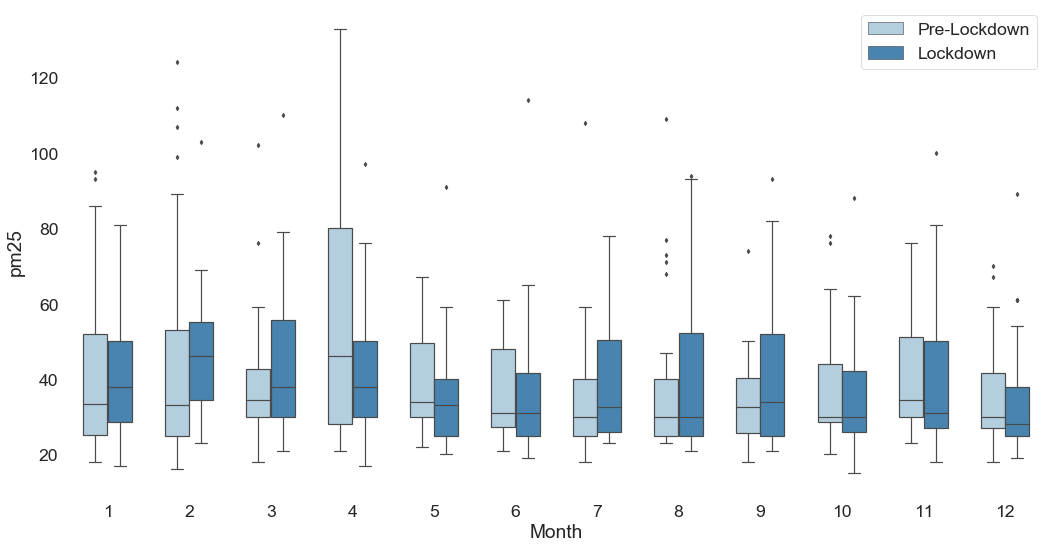

In [224]:
#q = df["Consumption"].quantile(0.97)
#dfq=df[df["Consumption"] < q]

#dic={0:'False',1:'True'}
#df['covid'] = dfq.weekday.map(dic)
sns.set_style('white')
sns.set_context("paper", font_scale=2)  
a=plt.figure(figsize=(15,8))

#a=plt.figure(figsize=(9,4))
#sns.set_context("paper", font_scale=1.5)  
plt1=sns.boxplot('month','pm25',hue='covid',width=0.6,fliersize=3,
                    data=df, palette='Blues');                                                                                                                                                                                                                                                                                                                                             
#plt.title('Box Plot of Consumption by Weekend/Weekday')    
#a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.legend(fontsize='xx-large', title_fontsize='40')
plt.xlabel('Month')
plt.tight_layout()                                                                                                                  
plt.legend().set_visible(True)
plt.savefig('Fig4.png', dpi=300)

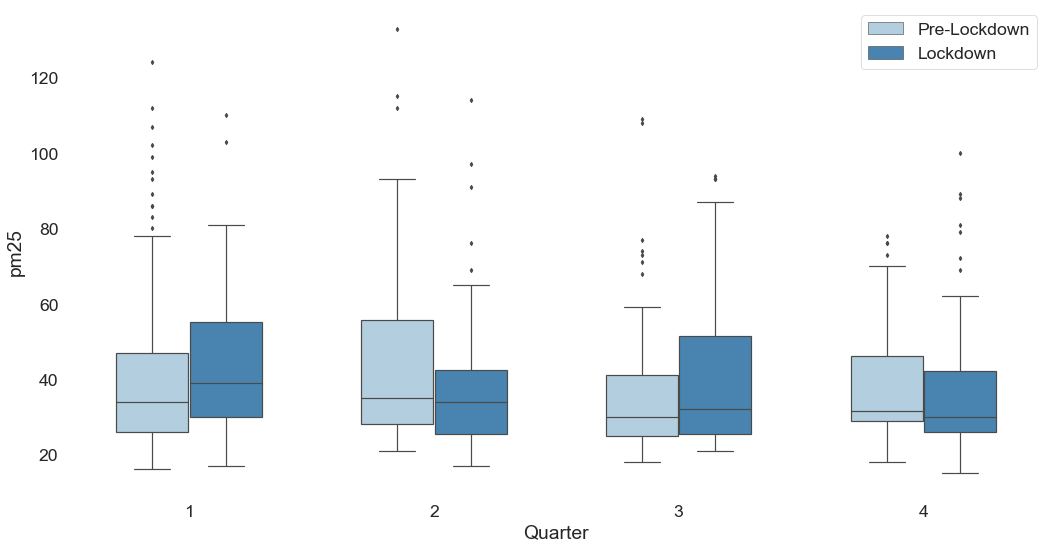

In [223]:
#q = df["Consumption"].quantile(0.97)
#dfq=df[df["Consumption"] < q]

#dic={0:'False',1:'True'}
#df['covid'] = dfq.weekday.map(dic)
sns.set_style('white')
sns.set_context("paper", font_scale=2)  
a=plt.figure(figsize=(15,8))

#a=plt.figure(figsize=(9,4))
#sns.set_context("paper", font_scale=1.5)  
plt1=sns.boxplot('quarter','pm25',hue='covid',width=0.6,fliersize=3,
                    data=df, palette='Blues');                                                                                                                                                                                                                                                                                                                                             
#plt.title('Box Plot of Consumption by Weekend/Weekday')    
#a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.legend(fontsize='xx-large', title_fontsize='40')
plt.xlabel('Quarter')
plt.tight_layout()                                                                                                                  
plt.legend().set_visible(True)
plt.savefig('Fig3.png', dpi=300)

In [187]:
df_pre = df[df['Date']<'2020-03-24']

In [188]:
df_lock = df[df['Date']>='2020-03-24']

In [189]:
df_plot = df_lock

/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/zmy/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:13

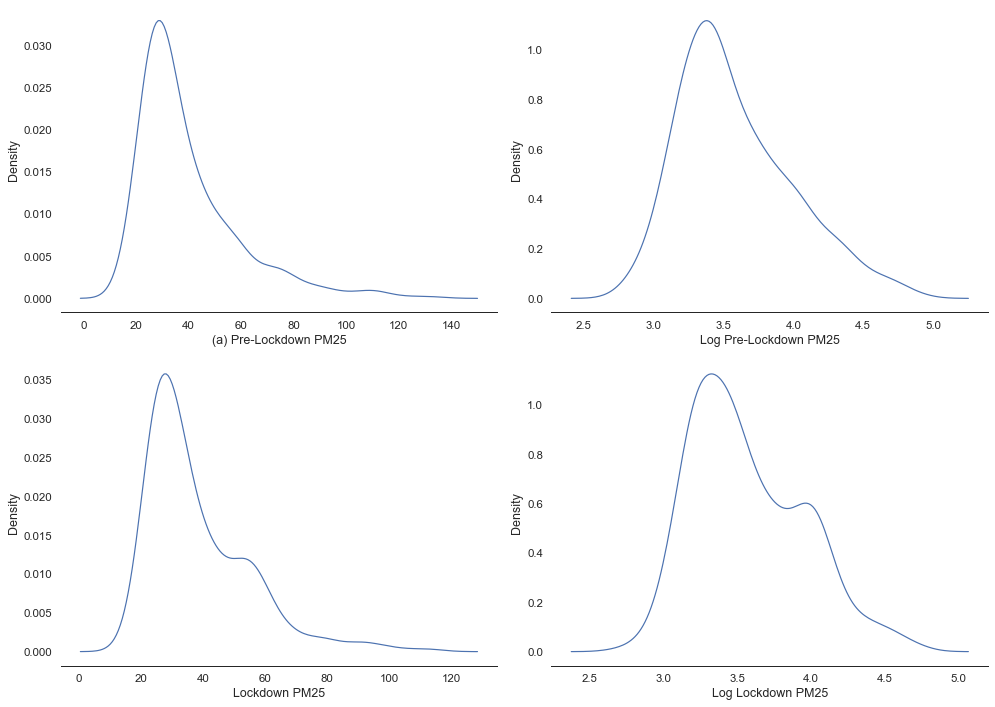

In [190]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
a=plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.2)

sns.kdeplot(df_pre['pm25']);
plt.xlabel('(a) Pre-Lockdown PM25')
plt.ylabel('Density')
sns.despine(left=True);
plt.tight_layout() 

df_pre['pm25'] = np.log(df_pre['pm25'])

plt.subplot(2,2,2)
sns.kdeplot(df_pre['pm25']);
plt.xlabel('Log Pre-Lockdown PM25')
plt.ylabel('Density')
sns.despine(left=True);
plt.tight_layout() 

plt.subplot(2,2,3)
sns.kdeplot(df_lock['pm25']);
plt.xlabel('Lockdown PM25')
plt.ylabel('Density')
sns.despine(left=True);
plt.tight_layout() 


df_lock['pm25'] = np.log(df_lock['pm25'])

plt.subplot(2,2,4)
sns.kdeplot(df_lock['pm25']);
plt.xlabel('Log Lockdown PM25')
plt.ylabel('Density')
sns.despine(left=True);
plt.tight_layout() 

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.savefig('Fig1.png', dpi=300)

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
a=plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.2)

sns.kdeplot(df_pre['So2']);
plt.xlabel('(a) Pre-Lockdown PM25')
plt.ylabel('Density')
sns.despine(left=True);
plt.tight_layout() 

df_pre['SO2'] = np.log(df_pre['SO2'])

plt.subplot(2,2,2)
sns.kdeplot(df_pre['SO2']);
plt.xlabel('Log Pre-Lockdown PM25')
plt.ylabel('Density')
sns.despine(left=True);
plt.tight_layout() 

plt.subplot(2,2,3)
sns.kdeplot(df_lock['SO2']);
plt.xlabel('Lockdown PM25')
plt.ylabel('Density')
sns.despine(left=True);
plt.tight_layout() 


df_lock['SO2'] = np.log(df_lock['SO2'])

plt.subplot(2,2,4)
sns.kdeplot(df_lock['SO2']);
plt.xlabel('Log Lockdown PM25')
plt.ylabel('Density')
sns.despine(left=True);
plt.tight_layout() 

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.savefig('Fig-so2.png', dpi=300)

In [178]:
df_plot = df_lock

In [117]:
df_pre_metrix = df_pre.loc[:,['pm25','co',  'no2', 'o3',  'so2', 'pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity']]

In [124]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 367 to 940
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pm25         494 non-null    float64       
 1   co           494 non-null    float64       
 2   dew          494 non-null    float64       
 3   humidity     494 non-null    float64       
 4   no2          494 non-null    float64       
 5   o3           494 non-null    float64       
 6   pm10         494 non-null    int64         
 7   pressure     494 non-null    float64       
 8   so2          494 non-null    float64       
 9   temperature  494 non-null    float64       
 10  wind_gust    494 non-null    float64       
 11  wind_speed   494 non-null    float64       
 12  year_month   494 non-null    object        
 13  Date         494 non-null    datetime64[ns]
 14  year         494 non-null    int64         
 15  month        494 non-null    int64         
 16  quarte

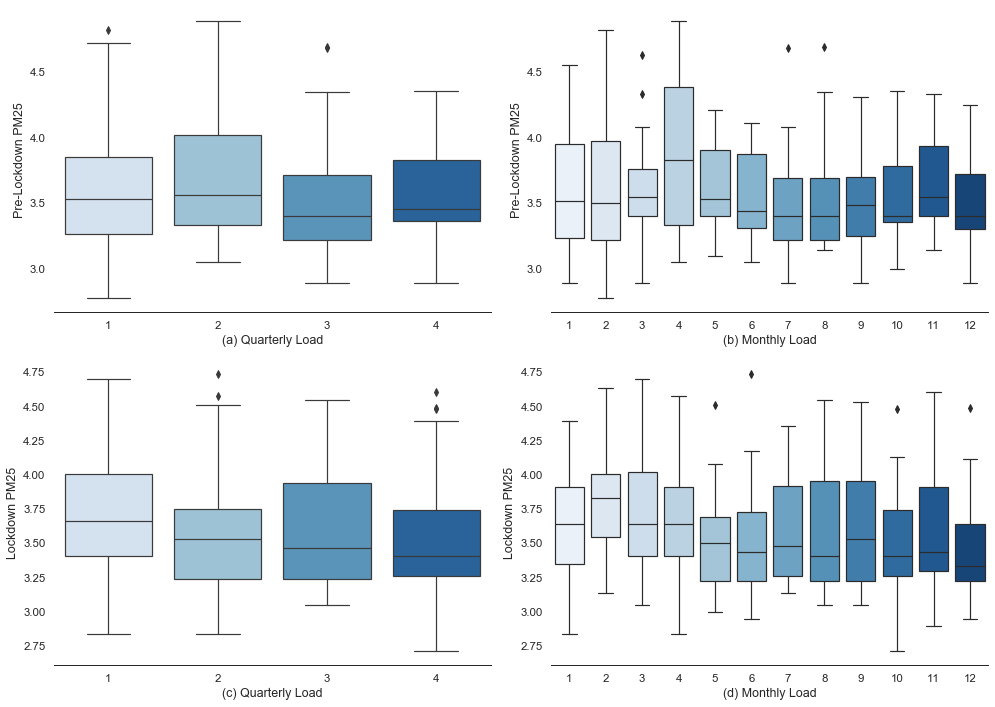

In [148]:

sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
a=plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="quarter", y="pm25", data=df_pre, palette='Blues');
plt.xlabel('(a) Quarterly Load')
plt.ylabel('Pre-Lockdown PM25')
sns.despine(left=True);
plt.tight_layout() 

plt.subplot(2,2,2)

sns.boxplot(x="month", y="pm25", data=df_pre, palette='Blues');
plt.xlabel('(b) Monthly Load')
plt.ylabel('Pre-Lockdown PM25')
sns.despine(left=True);
plt.tight_layout() 

plt.subplot(2,2,3)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="quarter", y="pm25", data=df_lock, palette='Blues');
plt.xlabel('(c) Quarterly Load')
plt.ylabel('Lockdown PM25')
sns.despine(left=True);
plt.tight_layout() 

plt.subplot(2,2,4)

sns.boxplot(x="month", y="pm25", data=df_lock, palette='Blues');
plt.xlabel('(d) Monthly Load')
plt.ylabel('Lockdown PM25')
sns.despine(left=True);
plt.tight_layout() 

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.savefig('Fig2.png', dpi=300)

In [72]:
#df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date') 

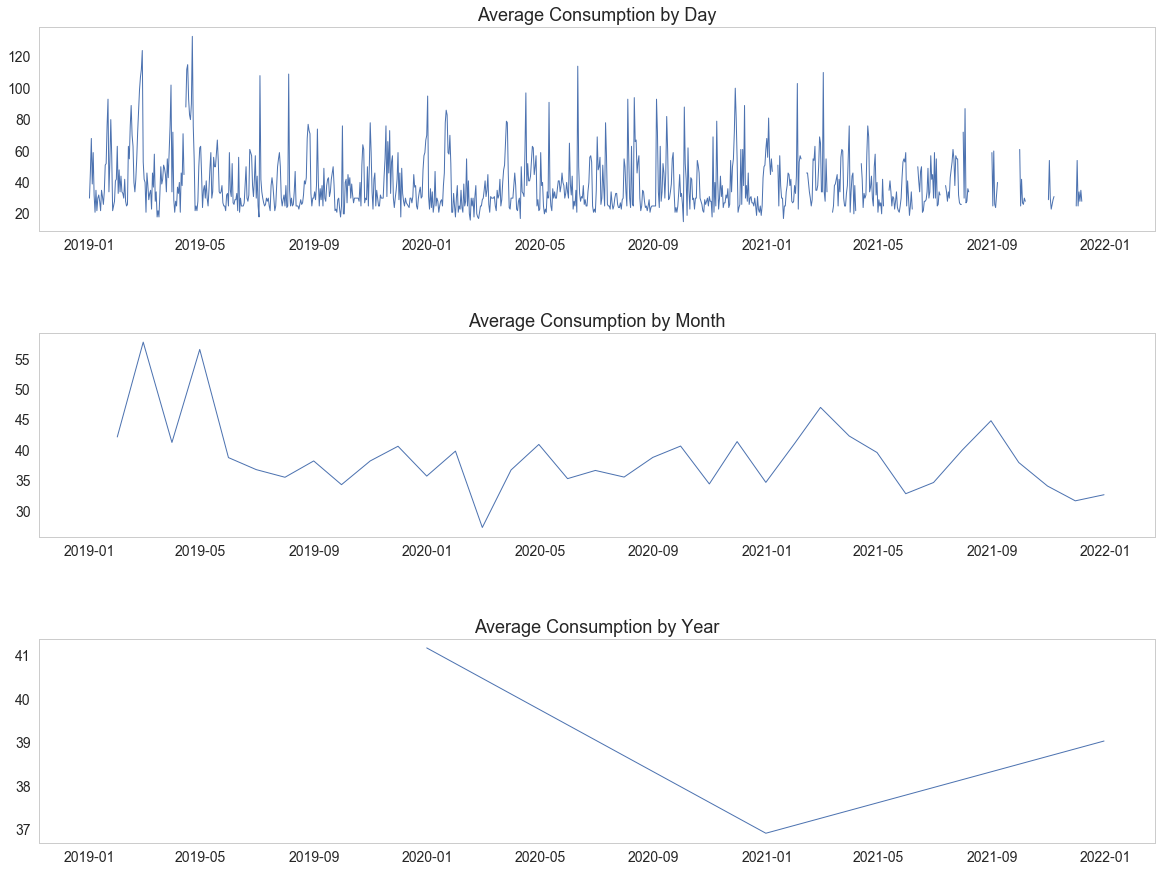

In [75]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(3,1,1)
ax1.plot(df['pm25'].resample('D').mean(),linewidth=1)
ax1.set_title('Average Consumption by Day', fontsize=18)
#ax1.set_ylabel('Average Consumption', fontsize=14)
#ax1.set_xlabel('Day of Crime', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(df['pm25'].resample('M').mean(),linewidth=1)
ax2.set_title('Average Consumption by Month', fontsize=18)
#ax2.set_ylabel('# of Crimes', fontsize=14)
#ax2.set_xlabel('Month of Crime', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3  = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(df['pm25'].resample('A').mean(),linewidth=1)
ax3.set_title('Average Consumption by Year', fontsize=18)
#ax3.set_ylabel('# of Crimes', fontsize=14)
#ax3.set_xlabel('Year of Crime', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)

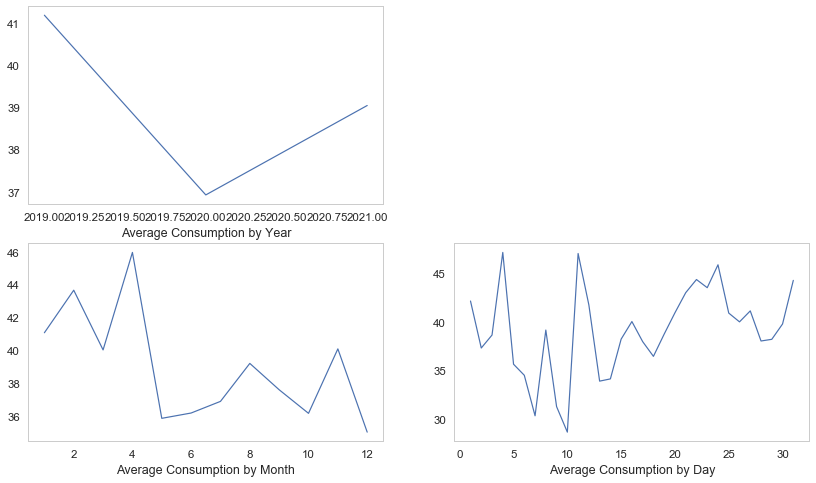

In [76]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('year').pm25.agg('mean').plot();
plt.xlabel('Average Consumption by Year')


plt.subplot(2,2,3)
df.groupby('month').pm25.agg('mean').plot();
plt.xlabel('Average Consumption by Month')

plt.subplot(2,2,4)
df.groupby('day').pm25.agg('mean').plot();
plt.xlabel('Average Consumption by Day');

In [46]:
df_pre = df[df['Date']<'2020-03-24']

In [80]:

df2=df.resample('D').mean()

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(30).mean()
    rolstd = timeseries.rolling(30).std()


    #Plot rolling statistics:
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [191]:
#test_stationarity(df2.pm25)

In [47]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 701
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pm25         447 non-null    int64         
 1   co           447 non-null    float64       
 2   dew          447 non-null    float64       
 3   humidity     447 non-null    float64       
 4   no2          447 non-null    float64       
 5   o3           447 non-null    float64       
 6   pm10         447 non-null    int64         
 7   pressure     447 non-null    float64       
 8   so2          447 non-null    float64       
 9   temperature  447 non-null    float64       
 10  wind_gust    447 non-null    float64       
 11  wind_speed   447 non-null    float64       
 12  year_month   447 non-null    object        
 13  Date         447 non-null    datetime64[ns]
 14  year         447 non-null    int64         
 15  month        447 non-null    int64         
 16  day     

In [48]:
df_lock = df[df['Date']>='2020-03-24']

In [49]:
df_lock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 367 to 940
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pm25         494 non-null    int64         
 1   co           494 non-null    float64       
 2   dew          494 non-null    float64       
 3   humidity     494 non-null    float64       
 4   no2          494 non-null    float64       
 5   o3           494 non-null    float64       
 6   pm10         494 non-null    int64         
 7   pressure     494 non-null    float64       
 8   so2          494 non-null    float64       
 9   temperature  494 non-null    float64       
 10  wind_gust    494 non-null    float64       
 11  wind_speed   494 non-null    float64       
 12  year_month   494 non-null    object        
 13  Date         494 non-null    datetime64[ns]
 14  year         494 non-null    int64         
 15  month        494 non-null    int64         
 16  day   

In [50]:
df_pre_metrix = df_pre.loc[:,['pm25','pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity']]

In [51]:
df_lock_metrix = df_lock.loc[:,['pm25','pressure',  'temperature', 'wind_gust', 'wind_speed','dew', 'humidity']]

In [60]:
corr=df_pre_metrix.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,pm25,pressure,temperature,wind_gust,wind_speed,dew,humidity
pm25,nan,nan,nan,nan,nan,nan,nan
pressure,0.39,nan,nan,nan,nan,nan,nan
temperature,-0.17,0.04,nan,nan,nan,nan,nan
wind_gust,-0.49,-0.39,-0.14,nan,nan,nan,nan
wind_speed,-0.45,-0.37,-0.14,0.96,nan,nan,nan
dew,-0.11,-0.09,0.87,-0.18,-0.17,nan,nan
humidity,0.08,-0.27,-0.50,0.02,0.03,-0.07,nan


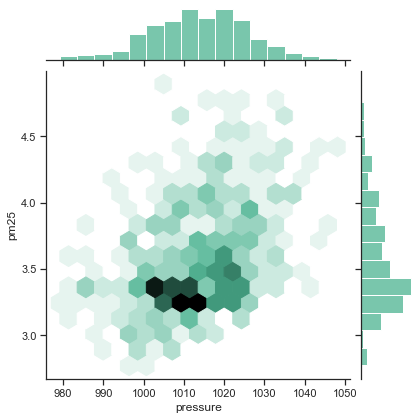

In [62]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")
sns.jointplot(x=df_pre_metrix['pressure'], y=df_pre_metrix['pm25'] , kind="hex", color="#4CB391")

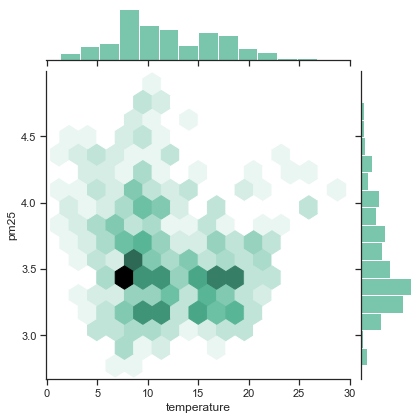

In [63]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")
sns.jointplot(x=df_pre_metrix['temperature'], y=df_pre_metrix['pm25'] , kind="hex", color="#4CB391")

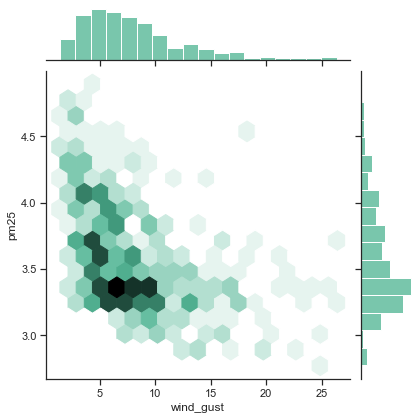

In [64]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")
sns.jointplot(x=df_pre_metrix['wind_gust'], y=df_pre_metrix['pm25'] , kind="hex", color="#4CB391")

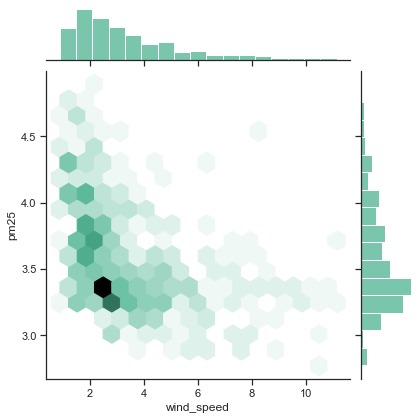

In [65]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")
sns.jointplot(x=df_pre_metrix['wind_speed'], y=df_pre_metrix['pm25'] , kind="hex", color="#4CB391")

## Visualization

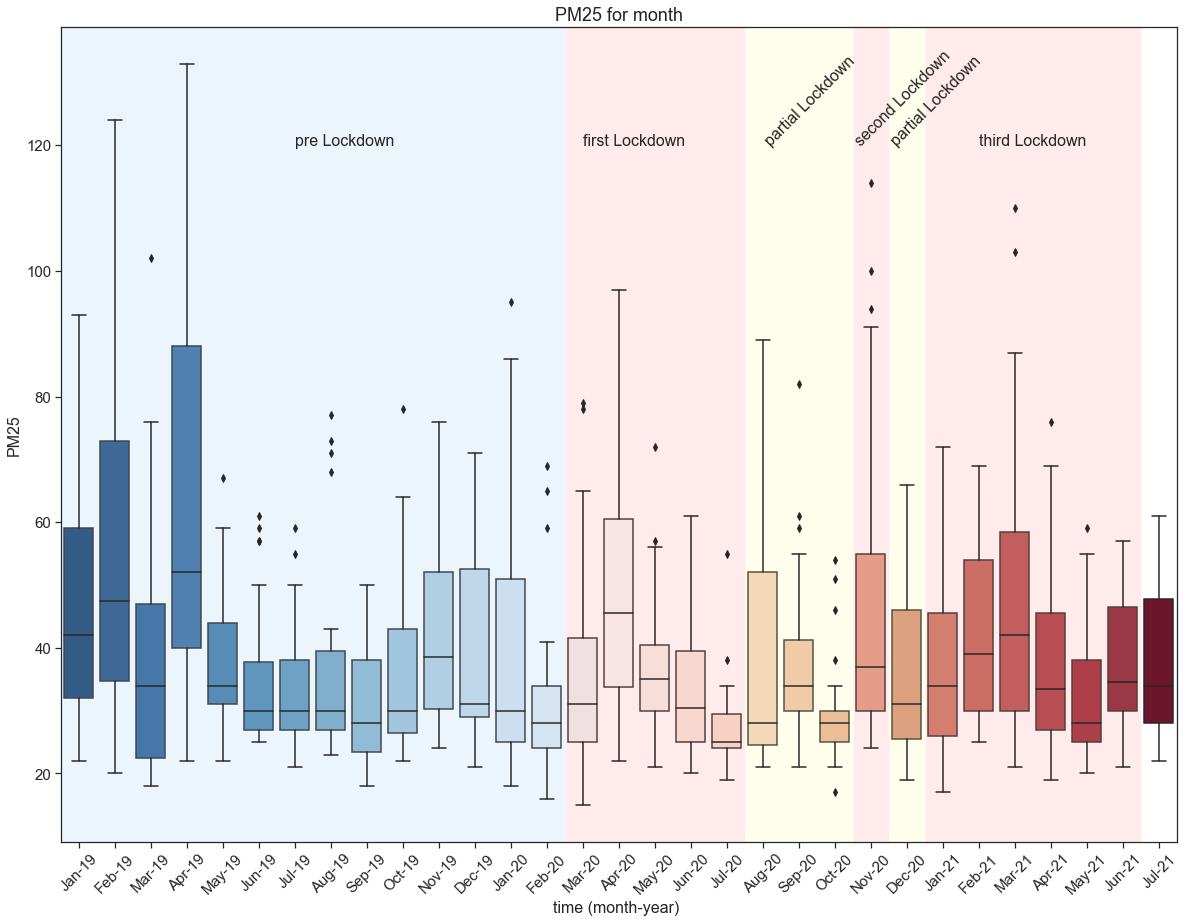

In [193]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 18.5, facecolor='r', alpha=0.2)
plt.axvspan(18.5, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=120,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=120,s='first Lockdown',fontsize=16)
plt.text(x=19,y=120,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=120,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=120,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25,y=120,s='third Lockdown',fontsize=16)


sns.boxplot(x="year_month", y="pm25",data=df,palette="RdBu_r",ax=ax)
ax.set_title('PM25 for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("PM25",fontsize=16)

plt.savefig('Fig-box-pm25.png', dpi=300)

Text(0, 0.5, 'PM10')

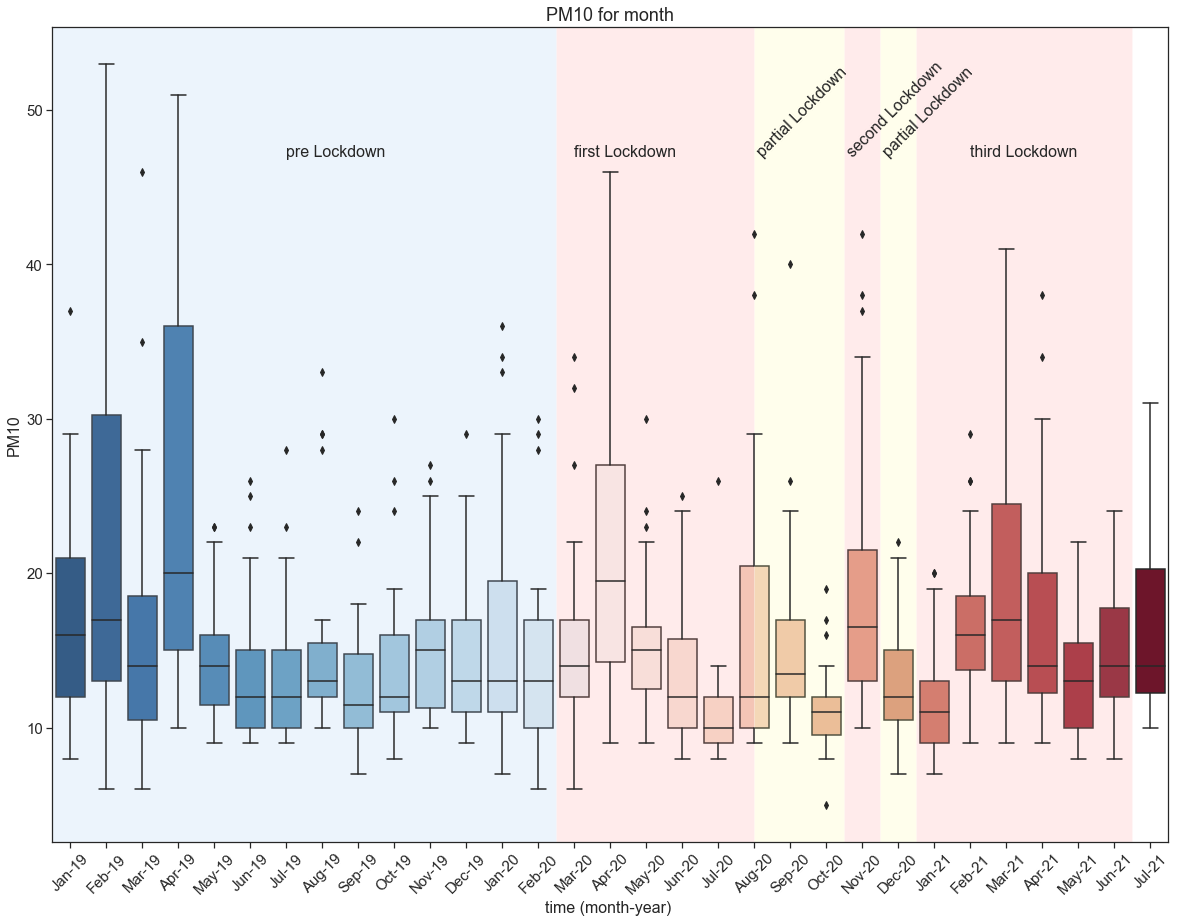

In [223]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 19, facecolor='r', alpha=0.2)
plt.axvspan(19, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=47,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=47,s='first Lockdown',fontsize=16)
plt.text(x=19,y=47,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=47,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=47,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25,y=47,s='third Lockdown',fontsize=16)

sns.boxplot(x="year_month", y="pm10",data=df,palette="RdBu_r",ax=ax)
ax.set_title('PM10 for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("PM10",fontsize=16)

Text(0, 0.5, 'CO')

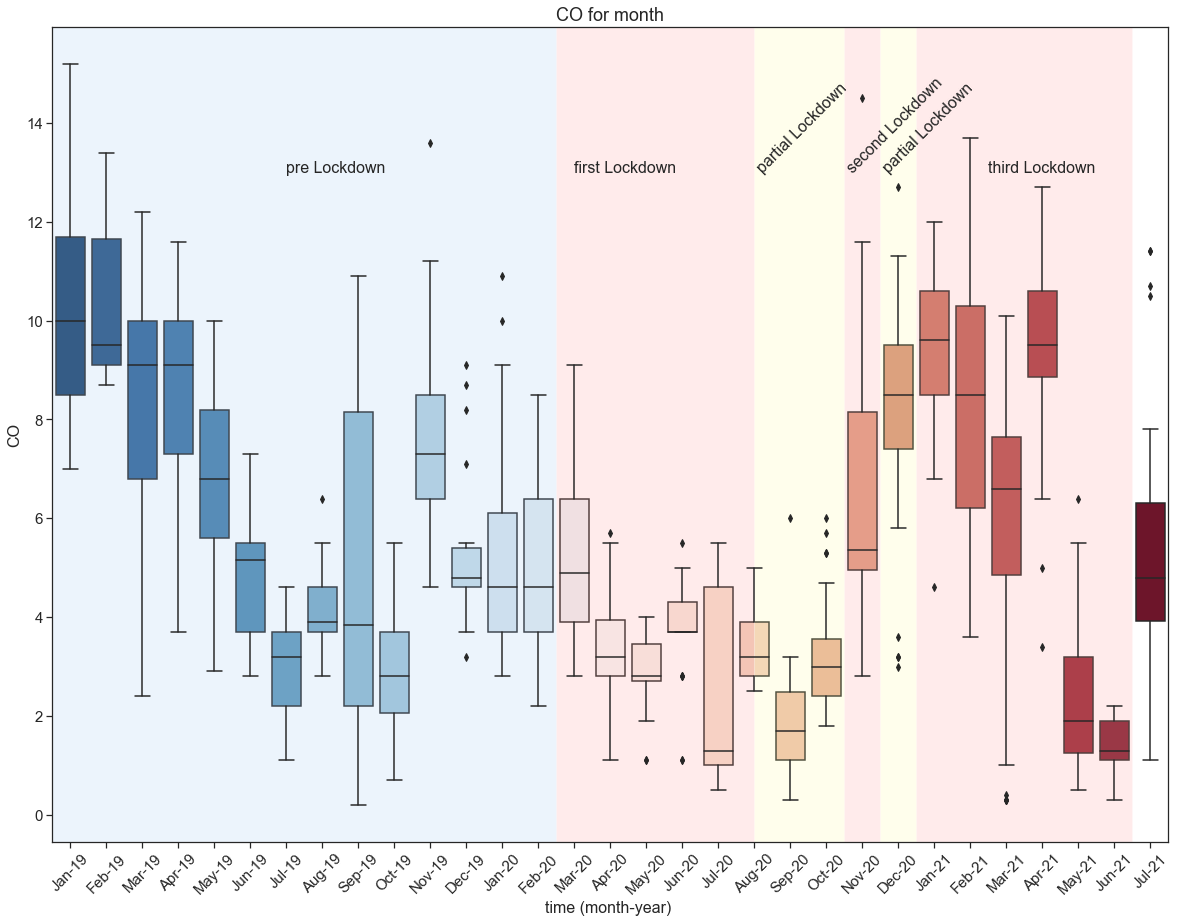

In [226]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 19, facecolor='r', alpha=0.2)
plt.axvspan(19, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=13,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=13,s='first Lockdown',fontsize=16)
plt.text(x=19,y=13,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=13,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=13,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25.5,y=13,s='third Lockdown',fontsize=16)

sns.boxplot(x="year_month", y="co",data=df,palette="RdBu_r",ax=ax)
ax.set_title('CO for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("CO",fontsize=16)

Text(0, 0.5, 'O3')

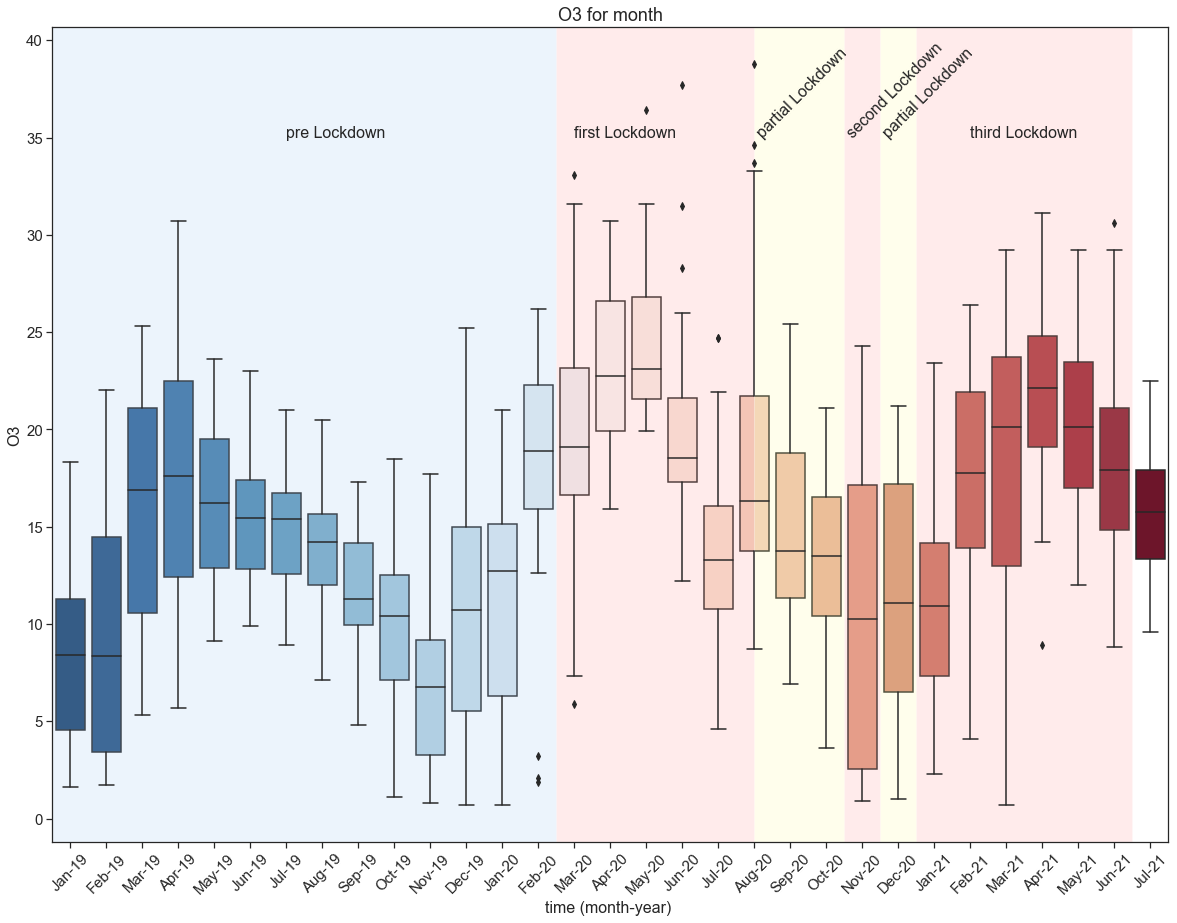

In [227]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 19, facecolor='r', alpha=0.2)
plt.axvspan(19, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=35,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=35,s='first Lockdown',fontsize=16)
plt.text(x=19,y=35,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=35,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=35,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25,y=35,s='third Lockdown',fontsize=16)

sns.boxplot(x="year_month", y="o3",data=df,palette="RdBu_r",ax=ax)
ax.set_title('O3 for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("O3",fontsize=16)

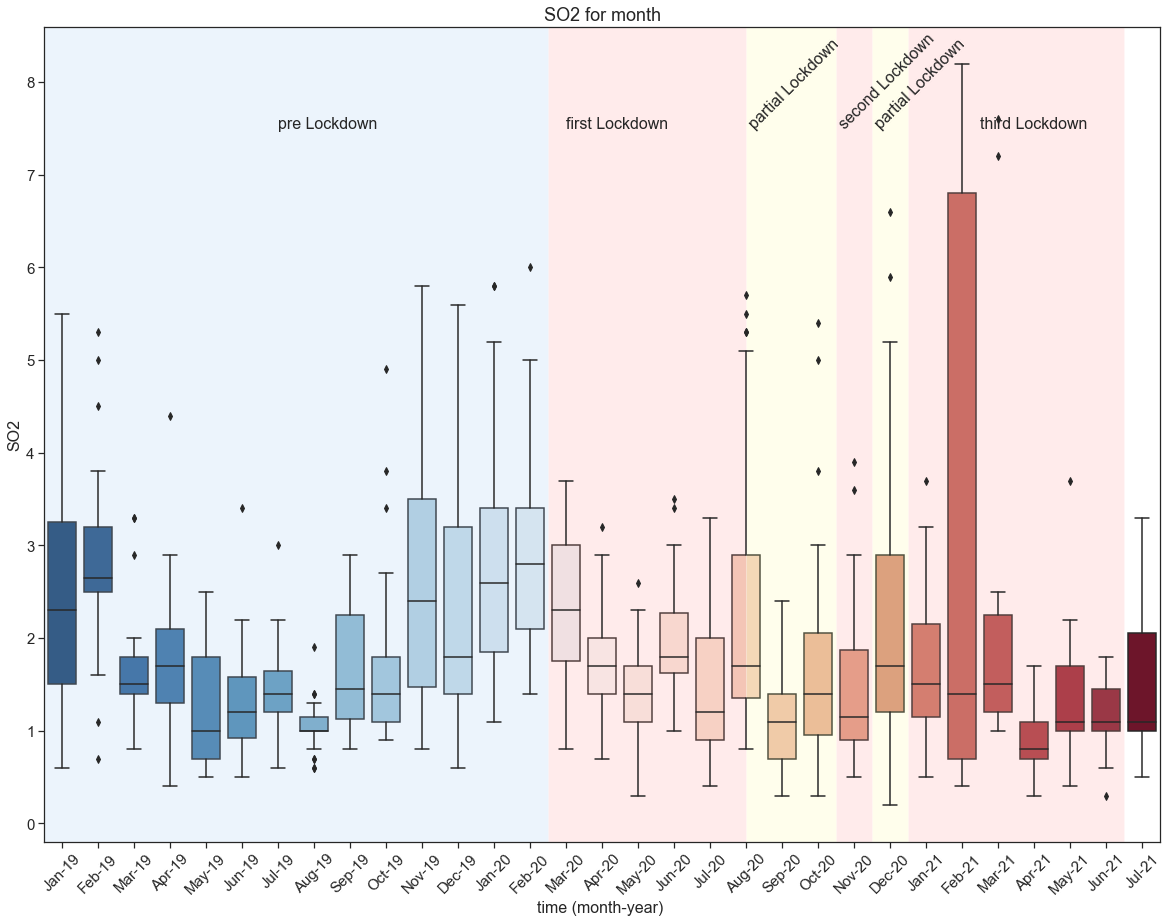

In [194]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 19, facecolor='r', alpha=0.2)
plt.axvspan(19, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=7.5,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=7.5,s='first Lockdown',fontsize=16)
plt.text(x=19,y=7.5,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=7.5,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=7.5,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25.5,y=7.5,s='third Lockdown',fontsize=16)

sns.boxplot(x="year_month", y="so2",data=df,palette="RdBu_r",ax=ax)
ax.set_title('SO2 for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("SO2",fontsize=16)

plt.savefig('Fig-box-so2.png', dpi=300)

In [148]:
df.columns

Index(['Date', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25',
       'pressure', 'so2', 'temperature', 'wind-gust', 'wind-speed',
       'year_month', 'year', 'month', 'day'],
      dtype='object')

In [149]:
select= [x for x in ['co',  'no2', 'o3', 'pm10', 'pm25','so2',
       'pressure',  'temperature', 'wind-gust', 'wind-speed''dew', 'humidity',]]

Text(0, 0.5, 'NO2')

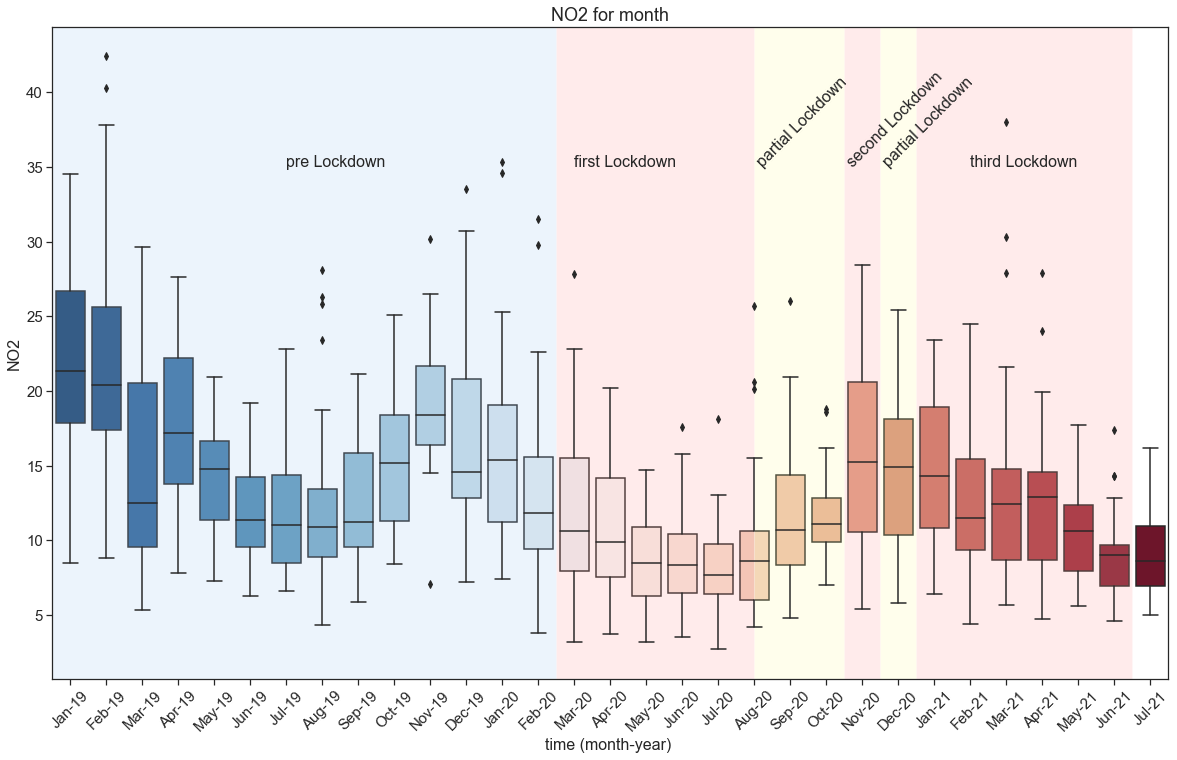

In [230]:
f,ax = plt.subplots(1,1, figsize=(20,12))
sns.set_theme(style="ticks", palette="pastel")

plt.axvspan(-0.5, 13.5, facecolor='b', alpha=0.2)
plt.axvspan(13.5, 19, facecolor='r', alpha=0.2)
plt.axvspan(19, 21.5, facecolor='y', alpha=0.2)
plt.axvspan(21.5, 22.5, facecolor='r', alpha=0.2)
plt.axvspan(22.5, 23.5, facecolor='y', alpha=0.2)
plt.axvspan(23.5, 29.5, facecolor='r', alpha=0.2)

plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)

plt.text(x=6,y=35,s='pre Lockdown',fontsize=16)
plt.text(x=14,y=35,s='first Lockdown',fontsize=16)
plt.text(x=19,y=35,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=21.5,y=35,s='second Lockdown',fontsize=16,rotation=45)
plt.text(x=22.5,y=35,s='partial Lockdown',fontsize=16,rotation=45)
plt.text(x=25,y=35,s='third Lockdown',fontsize=16)

sns.boxplot(x="year_month", y="no2",data=df,palette="RdBu_r",ax=ax)
ax.set_title('NO2 for month',fontsize=18)
ax.set_xlabel("time (month-year) ",fontsize=16)
ax.set_ylabel("NO2",fontsize=16)


Text(0.5, 1.0, 'Ratio of infected (%)')

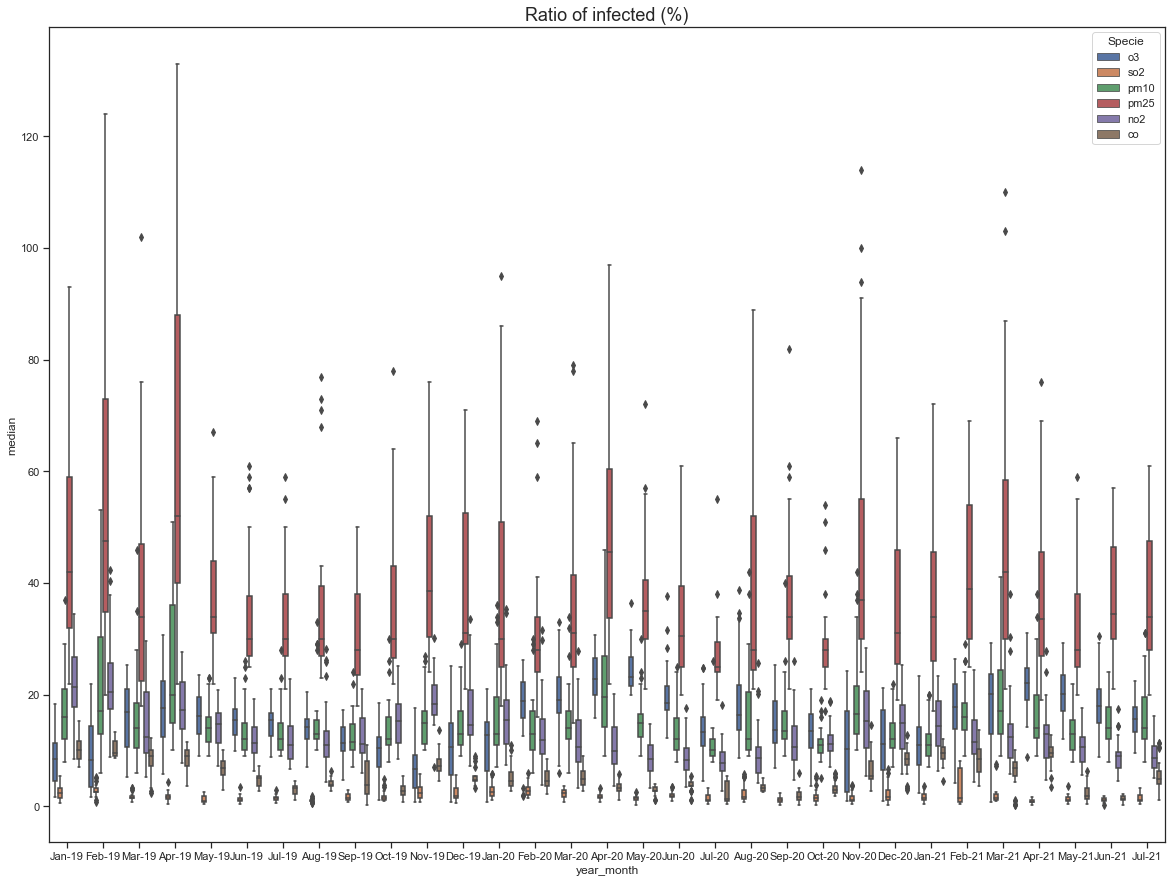

In [105]:
f,ax = plt.subplots(1,1, figsize=(20,15))
sns.set_theme(style="ticks", palette="pastel")


sns.boxplot(x="year_month", y="median", hue="Specie",data=df_list1, palette="Set3",ax = ax)
#ax.set_title('Ratio of infected (%)',fontsize=18)


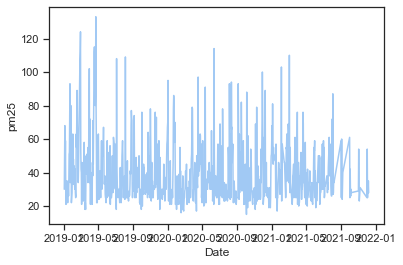

In [94]:
#f,ax = plt.subplots(1,1, figsize=(20,15))
sns.lineplot(data=df, x="Date", y="pm25")